In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
data = pd.read_csv("insurancee.csv")
data.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [16]:
data.shape

(1338, 7)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


ValueError: could not convert string to float: 'female'

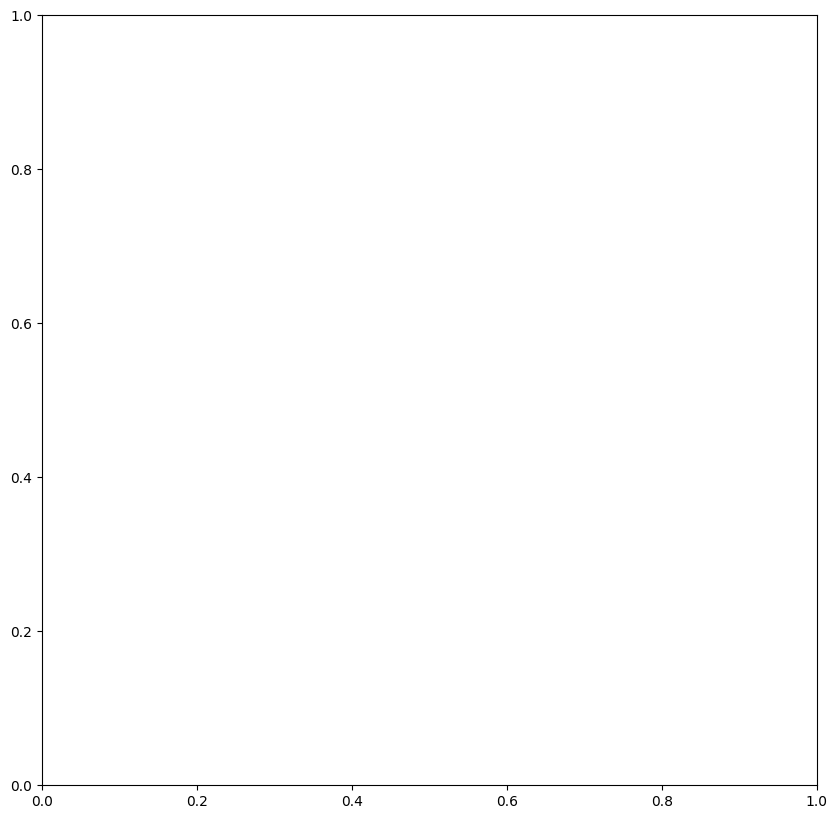

In [18]:
#Check the feature correlations(mientras este mas cercano a uno hay mayor correlatividad)
fig, ax=plt.subplots(figsize=(10,10))

corr=data.corr()
sns.heatmap(corr, annot=True, ax=ax)

# Label Encode object Types

In [19]:
#Todos los objetos los calsifica y los cuenta 
d_types = dict(data.dtypes)
for name, type_ in d_types.items():
    if str(type_) == 'object':
        print(f"<========{name} ========>")
        print(data[name].value_counts())
        print()

<========sex ========>
sex
male      676
female    662
Name: count, dtype: int64

<========smoker ========>
smoker
no     1064
yes     274
Name: count, dtype: int64

<========region ========>
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



In [20]:
#Aqui se convierten esas columnas (smoker, sex y region) en enteros 
from sklearn.preprocessing import LabelEncoder

for name, type_ in d_types.items():
    if str(type_) == 'object':
        le = LabelEncoder()
        data[name] = le.fit_transform(data[name])

# Check info Label Encoding

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [22]:
#se especifica que columnas se toman en cuenta, -1 significa que la ultima no 
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [23]:
x.shape , y.shape

((1338, 6), (1338,))

In [24]:
from sklearn.model_selection import train_test_split 

xtrain, xtest, ytrain, ytest = train_test_split(x, y , test_size = 0.2, random_state = 4) 

In [25]:
from sklearn.preprocessing import StandardScaler 

Scaler = StandardScaler()
xtrain = Scaler.fit_transform(xtrain)
xtest = Scaler.transform(xtest)



In [26]:
#Como afecta la scala estandar a los datos 
xtrain.shape  , xtest.shape  

((1070, 6), (268, 6))

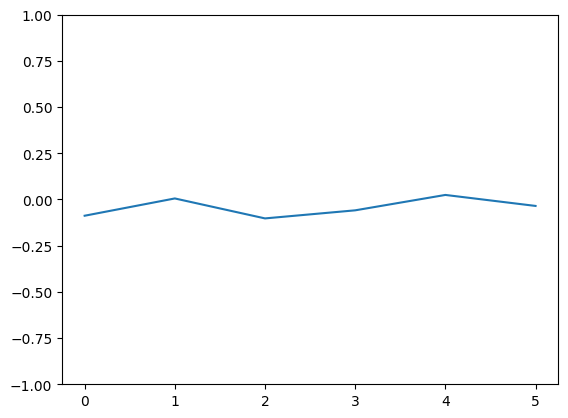

In [27]:
#Check whether data is standardized or not 
#mean should be 1 

plt.ylim(-1,1)

means = []
for i in range(x.shape[1]):
    means.append(np.mean(xtest[:,i]))

plt.plot(means, scaley=False )

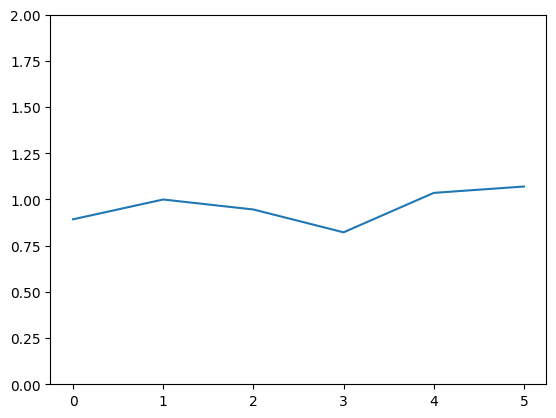

In [28]:
#Check variances 

plt.ylim(0,2)

vars = []
for i in range(x.shape[1]):
    vars.append(np.var(xtest[:,i]))

plt.plot(vars)

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain, ytrain)



LinearRegression()

In [30]:
model.coef_

array([3732.1576253 , -180.9623548 , 1947.05093741,  491.85992684,
       9879.91019114, -493.7954718 ])

In [31]:
model.intercept_

13479.206925233628

In [32]:
model.coef_.dot(xtest[10,:]) + model.intercept_
# Y = W * X + C

3610.2356296356356

In [33]:
model.predict(xtest[10,:].reshape(1,-1))

array([3610.23562964])